# Retrieve DDL measurements

In [1]:
import matplotlib.pyplot as plt
import ddlpy

# enabling debug logging so we can see what happens in the background
import logging
logging.basicConfig()
logging.getLogger("ddlpy").setLevel(logging.DEBUG)

## Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:ddlpy.ddlpy:Requesting at https://waterwebservices.beta.rijkswaterstaat.nl/test/METADATASERVICES/OphalenCatalogus with request: {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Groeperingen": true, "Parameters": true, "ProcesTypes": true, "Compartimenten": true}}


In [3]:
locations.to_json(r'locations.json', orient='records')

In [4]:
## also add code as a variable
locations['Code'] = locations.index
locations.head()

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
fortcrevecoeur,2258,51.733567,5.269946,ETRS89,Fort Crevecoeur,monding van de Dieze,(massa)Concentratie fosfor totaal in Oppervlak...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,mg/l,milligram per liter,P,uitgedrukt in fosfor,Ptot,fosfor totaal,,,fortcrevecoeur
bremerhaven,716,53.549304,8.565444,ETRS89,Bremerhaven,Bremerhaven,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,GETETBRKD2,Getijextreem berekend,bremerhaven
twenthekanaal.hoofdkanaalkm29p500,12787,52.224782,6.585077,ETRS89,"Twenthekanaal, Hoofdkanaal km. 29.500",Poelsbeek,Gemiddelde Temperatuur in Oppervlaktewater in oC,meting,OW,Oppervlaktewater,...,Temperatuur,oC,graad Celsius,NVT,Niet van toepassing,,,,,twenthekanaal.hoofdkanaalkm29p500
zeelandbrug.noord,3279,51.626683,3.909728,ETRS89,"Zeelandbrug, noord","Zeelandbrug, noord",Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,zeelandbrug.noord
poeldonk.dungensebrug,12277,51.680673,5.368564,ETRS89,"Poeldonk, Dungense Brug","Poeldonk, Dungense Brug",(massa)Concentratie perfluorundecaanzuur in Op...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,ug/l,microgram per liter,NVT,Niet van toepassing,PFUdA,perfluorundecaanzuur,,,poeldonk.dungensebrug


## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

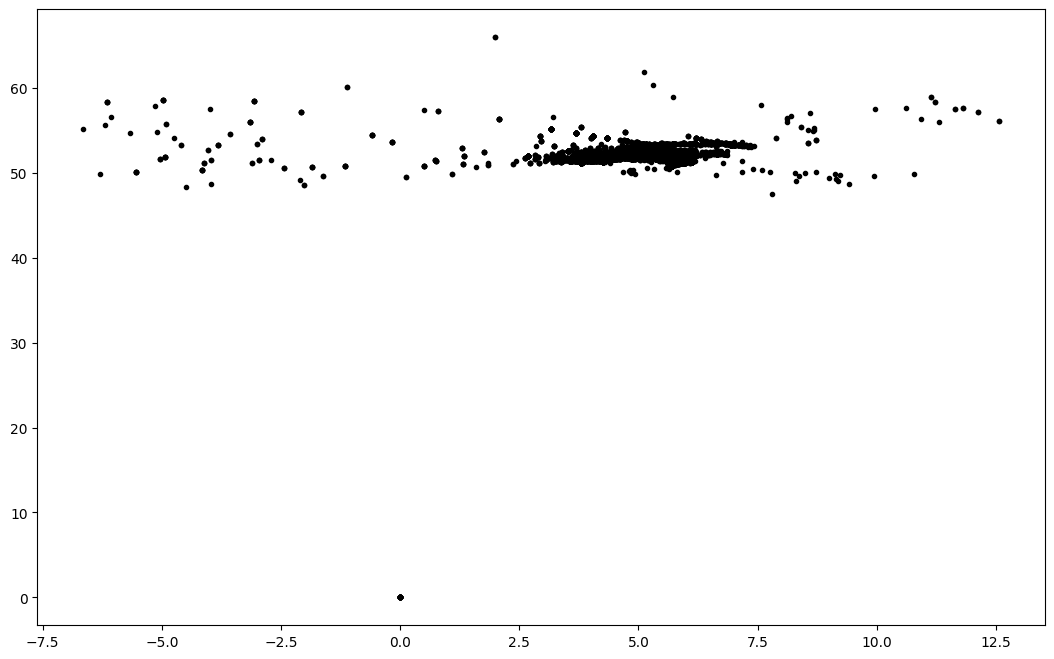

In [5]:
## Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.Lon, locations.Lat, 'k.')

In [6]:
# CHECK See what the data in the east is.
# These is a reference river for water quality near Chernobyl. 
locations.sort_values('Lon',  ascending=False).head(n=5)

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
viken,16714,56.149434,12.565486,ETRS89,Viken,Viken,Waterhoogte berekend astronomisch in Oppervlak...,astronomisch,OW,Oppervlaktewater,...,Waterhoogte berekend,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,viken
viken,16714,56.149434,12.565486,ETRS89,Viken,Viken,Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,viken
ringhals,17955,57.249470,12.115438,ETRS89,Ringhals,Ringhals,Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,ringhals
ringhals,17955,57.249470,12.115438,ETRS89,Ringhals,Ringhals,Waterhoogte berekend astronomisch in Oppervlak...,astronomisch,OW,Oppervlaktewater,...,Waterhoogte berekend,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,ringhals
goteborg.torshamnen,8442,57.682817,11.798748,ETRS89,"Goteborg, Torshamnen","Goteborg, Torshamnen",Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,goteborg.torshamnen


In [7]:
bool_stations = locations.index.isin(['hoekvanholland', 'ijmuiden.buitenhaven', 'scheveningen'])
bool_procestype = locations['ProcesType'].isin(['meting']) # meting/astronomisch/verwachting
bool_grootheid = locations['Grootheid.Code'].isin(['WATHTE']) # waterlevel (WATHTE)
bool_groepering = locations['Groepering.Code'].isin(['']) # timeseries (NVT) versus extremes
bool_hoedanigheid = locations['Hoedanigheid.Code'].isin(['NAP']) # vertical reference (NAP/MSL)
selected = locations.loc[bool_stations & bool_procestype & bool_grootheid & bool_groepering & bool_hoedanigheid]
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
ijmuiden.buitenhaven,7258,52.462326,4.554823,ETRS89,"IJmuiden, buitenhaven","IJmuiden, buitenhaven",Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,ijmuiden.buitenhaven
ijmuiden.buitenhaven,7258,52.462326,4.554823,ETRS89,"IJmuiden, buitenhaven","IJmuiden, buitenhaven",Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,ijmuiden.buitenhaven
scheveningen,2609,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,scheveningen
hoekvanholland,13603,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,hoekvanholland
hoekvanholland,13603,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,hoekvanholland


In [8]:
names = 'uit de kust'
selected = locations[locations.Naam.str.contains(names)].head()
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
terschelling.50kmuitdekust,9772,53.766773,4.765613,ETRS89,"Terschelling, 50 km uit de kust","Terschelling, 50 km uit de kust",Gemiddelde Temperatuur in Oppervlaktewater in oC,meting,OW,Oppervlaktewater,...,Temperatuur,oC,graad Celsius,NVT,Niet van toepassing,,,,,terschelling.50kmuitdekust
rottumerplaat.70kmuitdekust,2286,54.117356,6.212863,ETRS89,"Rottumerplaat, 70 km uit de kust","Rottumerplaat, 70 km uit de kust",Gemiddelde Windrichting in Lucht t.o.v. ware N...,meting,LT,Lucht,...,Windrichting,graad,graad,WARNDN,t.o.v. ware Noorden,,,,,rottumerplaat.70kmuitdekust
goeree20kmuitdekust,15290,51.953368,3.720361,ETRS89,Goeree 20 km uit de kust,Goeree 20 km uit de kust,(massa)Concentratie fosfor totaal in Oppervlak...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,mg/l,milligram per liter,pg,particulair gebonden,Ptot,fosfor totaal,,,goeree20kmuitdekust
terschelling.100kmuitdekust,9376,54.148726,4.340590,ETRS89,"Terschelling, 100 km uit de kust","Terschelling, 100 km uit de kust",(massa)Concentratie perfluorhexaanzuur in Oppe...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,ug/l,microgram per liter,NVT,Niet van toepassing,PFHxA,perfluorhexaanzuur,,,terschelling.100kmuitdekust
appelzak.2kmuitdekust,9101,51.385216,3.350962,ETRS89,"Appelzak, 2 km uit de kust","Appelzak, 2 km uit de kust",(massa)Concentratie cadmium in Oppervlaktewate...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,ug/l,microgram per liter,NVT,Niet van toepassing,Cd,cadmium,,,appelzak.2kmuitdekust


In [9]:
# multiple parameters avaialble per location, each combination is a row
selected = locations.loc['scheveningen']
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
scheveningen,2609,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,scheveningen
scheveningen,2609,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,GETETBRKD2,Getijextreem berekend,scheveningen
scheveningen,2609,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Getijextreemtype astronomisch in Oppervlaktewater,astronomisch,OW,Oppervlaktewater,...,,DIMSLS,dimensieloos,NVT,Niet van toepassing,NVT,NVT,GETETBRKD2,Getijextreem berekend,scheveningen


In [10]:
# subset to a single location/measurement location (waterhoogte timeseries for Scheveningen)
bool_stations = locations.index.isin(['ameland.nes'])
# meting/astronomisch/verwachting
bool_procestype = locations['ProcesType'].isin(['meting'])
# waterlevel/waterhoogte (WATHTE)
bool_grootheid = locations['Grootheid.Code'].isin(['WATHTE'])
# timeseries (NVT) versus extremes
bool_groepering = locations['Groepering.Code'].isin([''])
selected = locations.loc[bool_stations & bool_procestype & bool_grootheid & bool_groepering]
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
ameland.nes,6955,53.429766,5.759448,ETRS89,"Ameland, Nes","Ameland, Nes",Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,ameland.nes
ameland.nes,6955,53.429766,5.759448,ETRS89,"Ameland, Nes","Ameland, Nes",Gemiddelde Waterhoogte in Oppervlaktewater t.o...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,,,,,ameland.nes


In [11]:
# if we pass one row to the measurements function you can get all the measurements
measurements = ddlpy.measurements(selected.iloc[0], "2019-05-01", "2020-02-01")

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.60it/s]
DEBUG:ddlpy.ddlpy:8 duplicated values dropped


<Axes: xlabel='time'>

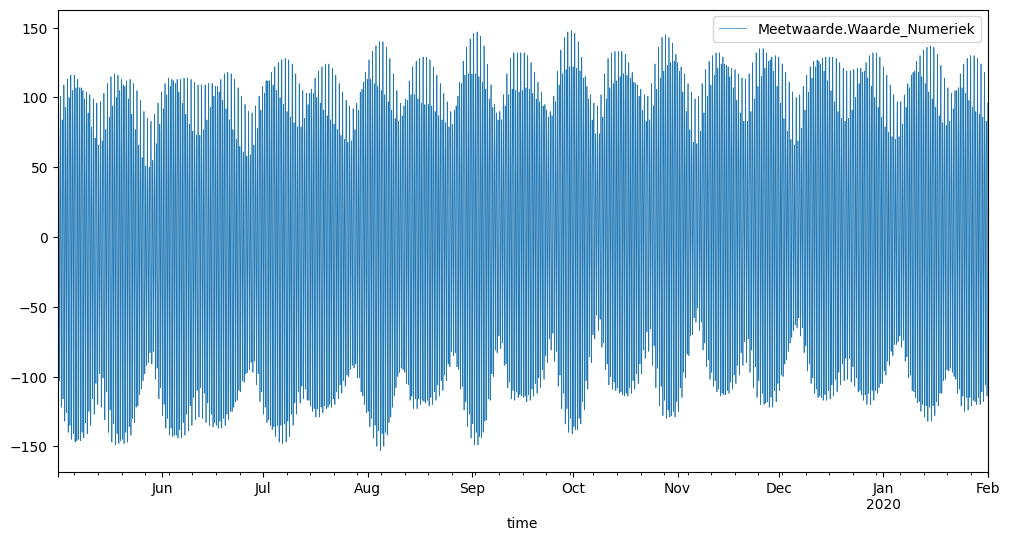

In [12]:
measurements.plot(y='Meetwaarde.Waarde_Numeriek', linewidth=0.5, figsize=(12, 6))

In [13]:
measurements

,WaarnemingMetadata.Statuswaarde,WaarnemingMetadata.Bemonsteringshoogte,WaarnemingMetadata.Referentievlak,WaarnemingMetadata.OpdrachtgevendeInstantie,WaarnemingMetadata.Kwaliteitswaardecode,Compartiment.Code,Compartiment.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Eenheid.Code,...,WaardeBewerkingsMethode.Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Meetwaarde.Waarde_Alfanumeriek,Meetwaarde.Waarde_Numeriek,Code,Coordinatenstelsel,Naam,Lon,Lat
time,,,,,,,,,,,,,,,,,,,,,
2019-05-01 01:00:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,-103,-103.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:10:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,-106,-106.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:20:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,-108,-108.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:30:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,-108,-108.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:40:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,-108,-108.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01 00:20:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,81,81.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2020-02-01 00:30:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,85,85.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2020-02-01 00:40:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,Niet van toepassing,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,89,89.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766


## Convert to xarray

In [14]:
drop_if_constant = ["WaarnemingMetadata.OpdrachtgevendeInstantie",
                    "WaarnemingMetadata.Bemonsteringshoogte",
                    "WaarnemingMetadata.Referentievlak",
                    "BioTaxonType.Code", "BemonsteringsSoort.Code", 
                    "Compartiment.Code", "Eenheid.Code", "Grootheid.Code", "Hoedanigheid.Code",
                    ]
ds = ddlpy.dataframe_to_xarray(measurements, drop_if_constant=drop_if_constant)
ds

<xarray.Dataset> Size: 3MB
Dimensions:                                  (time: 39745)
Coordinates:
  * time                                     (time) datetime64[ns] 318kB 2019...
Data variables:
    WaarnemingMetadata.Statuswaarde          (time) object 318kB 'Ongecontrol...
    WaarnemingMetadata.Kwaliteitswaardecode  (time) object 318kB '00' ... '00'
    Groepering.Code                          (time) object 318kB '' '' ... '' ''
    BemonsteringsApparaat.Code               (time) object 318kB '' '' ... '' ''
    BemonsteringsMethode.Code                (time) object 318kB '' '' ... '' ''
    MeetApparaat.Code                        (time) object 318kB '8000' ... '...
    WaardeBepalingsMethode.Code              (time) object 318kB 'other:F012'...
    WaardeBepalingsTechniek.Code             (time) object 318kB '' '' ... '' ''
    ProcesType                               (time) object 318kB 'astronomisc...
    Meetwaarde.Waarde_Numeriek               (time) float64 318kB -103.0 ... ...
Attributes: (12/19)
    Parameter.Code:                               NVT
    BioTaxon.Code:                                NVT
    Orgaan.Code:                                  NVT
    Typering.Code:                                NVT
    WaardeBewerkingsMethode.Code:                 NVT
    WaarnemingMetadata.OpdrachtgevendeInstantie:  RIKZMON_WAT
    ...                                           ...
    Hoedanigheid.Code:                            NAP
    Code:                                         ameland.nes
    Naam:                                         Ameland, Nes
    Coordinatenstelsel:                           ETRS89
    Lon:                                          5.759448
    Lat:                                          53.429766